**Denise Dodd: DSC680 - Applied Data Science: Project 1- St. Louis Crime**

# **Table of Contents**

[Load Data and Modules](#Loading)

[Review Data](#Review_Data)

[Question #1: Are there any trends in the time of year that crime occurs?](#Q1)

[Question #2: What caused the above spike in crime in June?](#Q2)

[Question #3: Are there any trends in the time of day that crime occurs?](#Q3)

[Question #4: Which categories of crime are most/least prevalent in St. Louis?](#Q4)

[Question #5: How is crime distributed among the districts?](#Q5)

[Question #6: What are the top crimes in each district?](#Q6)

[Question #7: What is the delay between when a crime occurs and when it is reported?](#Q7)

[Question #:8 How is the reporting delay dispersed among the different categories of crime?](#Q8)

[Question #:9 Why are the top three average lag times so much greater than the reporting lag time of other categories?](#Q9)

[Question #10: Can future crime rates be predicted so the police department can staff appropriately and have a benchmark to determine if mitigating efforts were effective?](#Q10)

[Resources](#Resources)

<span style="font-size: 18px; font-weight: bold;">Load Data and Modules</span><a id="Loading"></a>

In [1]:
# Import needed modules.
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import SARIMAX, ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set directory.
os.chdir('C:/Users/hadle/Downloads/STL Crime Data')

# Load data.
# The default encoding of UTF-8 was returning errors so hard-coded latin1
# to be the encoding method so the file can properly be read into Python.
jan_df = pd.read_csv('January2020.csv', encoding='latin1')
feb_df = pd.read_csv('February2020.csv', encoding='latin1')
mar_df = pd.read_csv('March2020.csv', encoding='latin1')
apr_df = pd.read_csv('April2020.csv', encoding='latin1')
may_df = pd.read_csv('May2020.csv', encoding='latin1')
jun_df = pd.read_csv('June2020.csv', encoding='latin1')
jul_df = pd.read_csv('July2020.csv', encoding='latin1')
aug_df = pd.read_csv('August2020.csv', encoding='latin1')
sep_df = pd.read_csv('September2020.csv', encoding='latin1')
oct_df = pd.read_csv('October2020.csv', encoding='latin1')
nov_df = pd.read_csv('November2020.csv', encoding='latin1')
dec_df = pd.read_csv('December2020.csv', encoding='latin1')

In [3]:
# Concatenate the monthly dataframes into one dataframe encompassing
# the full year of 2020.
crime_df = pd.concat([jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df, 
                      aug_df, sep_df, oct_df, nov_df, dec_df])

# Check for accuracy.
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df

The current shape of the dataframe is (44720, 21).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,ILEADSAddress,ILEADSStreet,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord
0,19-064672,2020-01,01/01/2016 00:01,Y,,,1,,21000,6,...,6000,HARNEY AVE,76,,,6000,HARNEY,0.0,0.0,NaN
1,20-001342,2020-01,01/01/2017 15:01,Y,,,1,,115400,1,...,622,W COURTOIS ST,2,,,622,COURTOIS,887302.4,988957.3,NaN
2,20-000276,2020-01,01/01/2020 00:01,Y,,,1,,41011,3,...,1609,S 13TH ST,33,,,1609,13TH,904149.1,1012541.0,NaN
3,20-000390,2020-01,01/01/2020 00:01,Y,,,1,,64701,1,...,4677,ROSA AVE,6,,,4677,ROSA,883704.8,999396.9,NaN
4,20-000025,2020-01,01/01/2020 00:01,Y,,,1,,64701,4,...,0,S 11TH ST / SPRUCE ST,35,,,,,906542.5,1016191.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,20-058746,2020-12,12/31/2020 22:20,Y,,,1,,41011,4,...,811.0,NaN,35,NaN,NaN,811,SPRUCE,0.0,0.0,NaN
3315,20-058749,2020-12,12/31/2020 22:50,Y,,,1,,265321,2,...,2722.0,BENNETT,11,NaN,NaN,2722,BENNETT,0.0,0.0,NaN
3316,21-000004,2020-12,12/31/2020 23:00,Y,,,1,,265321,4,...,NaN,NaN,67,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3317,21-000001,2020-12,12/31/2020 23:15,Y,,,1,,38111,4,...,NaN,NaN,65,NaN,NaN,NaN,NaN,0.0,0.0,NaN


<span style="font-size: 18px; font-weight: bold;">Review and Clean Data</span><a id="Review_Data"></a>

Review the data type for each column.

In [4]:
# Find the data type for each column.
crime_df.dtypes

Complaint              object
CodedMonth             object
DateOccur              object
FlagCrime              object
FlagUnfounded          object
FlagAdministrative     object
Count                   int64
FlagCleanup            object
Crime                   int64
District                int64
Description            object
ILEADSAddress          object
ILEADSStreet           object
Neighborhood            int64
LocationName           object
LocationComment        object
CADAddress             object
CADStreet              object
XCoord                float64
YCoord                float64
Ycoord                float64
dtype: object

------
Properly format date and time information.

In [5]:
# Convert "DateOccur" col to datetime format.
crime_df['DateOccur'] = pd.to_datetime(crime_df['DateOccur'], 
                                       format='%m/%d/%Y %H:%M')

# Seperate the "DateOccur" col into seperate "Date" and "Time" cols.
crime_df['Date'] = crime_df['DateOccur'].dt.date
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df['Time'] = crime_df['DateOccur'].dt.time

# Check for accuracy
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df.head(5)

The current shape of the dataframe is (44720, 23).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord,Date,Time
0,19-064672,2020-01,2016-01-01 00:01:00,Y,,,1,,21000,6,...,76,,,6000,HARNEY,0.0,0.0,NaN,2016-01-01,00:01:00
1,20-001342,2020-01,2017-01-01 15:01:00,Y,,,1,,115400,1,...,2,,,622,COURTOIS,887302.4,988957.3,NaN,2017-01-01,15:01:00
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,41011,3,...,33,,,1609,13TH,904149.1,1012541.0,NaN,2020-01-01,00:01:00
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,64701,1,...,6,,,4677,ROSA,883704.8,999396.9,NaN,2020-01-01,00:01:00
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,64701,4,...,35,,,,,906542.5,1016191.0,NaN,2020-01-01,00:01:00


-------
The "Crime" column has 6-digit "Uniform Crime Report" (UCR) numbers. The first two digits of these numbers provide the overall category that each offense falls into such as "Larceny" which can then be further broken down into "Larceny Over 500 dollars", "Grand Larceny", etc. I would like to extract the first 2 digits of the UCR numbers and map their associated categories to a new column in my dataframe. I will be using information found in the Uniform Crime Reporting Handbook (https://ucr.fbi.gov/additional-ucr-publications/ucr_handbook.pdf) to create my mapping.

In [6]:
# If there are only 5 digits in the "Crime" column, it is because there 
# is a leading 0 missing.
# I will add the leading zero back in so all UCR numbers are 6-characters.

# Ensure that the "Crime" col is formatted as string.
# Use zfill to ensure each entry in the "Crime" col is 6 characters,
# and if it's not add leading 0's until 6 characters are reached.
crime_df['Crime'] = crime_df['Crime'].astype(str).str.zfill(6)

# Check for accuracy
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df.head(5)

The current shape of the dataframe is (44720, 23).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,Neighborhood,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord,Date,Time
0,19-064672,2020-01,2016-01-01 00:01:00,Y,,,1,,021000,6,...,76,,,6000,HARNEY,0.0,0.0,NaN,2016-01-01,00:01:00
1,20-001342,2020-01,2017-01-01 15:01:00,Y,,,1,,115400,1,...,2,,,622,COURTOIS,887302.4,988957.3,NaN,2017-01-01,15:01:00
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,041011,3,...,33,,,1609,13TH,904149.1,1012541.0,NaN,2020-01-01,00:01:00
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,1,...,6,,,4677,ROSA,883704.8,999396.9,NaN,2020-01-01,00:01:00
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,4,...,35,,,,,906542.5,1016191.0,NaN,2020-01-01,00:01:00


In [7]:
# Double check that all entries in the "Crime" col are 6-characters.

# Create a new df that only includes rows where the entry in the "Crime" col
# is less than 6 characters.
# Print the shape of the new df. The shape should show that are 0 rows.
Crime_Under_Six = crime_df[crime_df['Crime'].str.len() != 6]
Crime_Under_Six.shape

(0, 23)

In [8]:
# Create a new col which only includes the first 2-digits of the "Crime" col
# which is a code representing the overall category of each crime.
crime_df['UCR'] = crime_df['Crime'].str[:2]

# Check for accuracy
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df.head(5)

The current shape of the dataframe is (44720, 24).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord,Date,Time,UCR
0,19-064672,2020-01,2016-01-01 00:01:00,Y,,,1,,021000,6,...,,,6000,HARNEY,0.0,0.0,NaN,2016-01-01,00:01:00,02
1,20-001342,2020-01,2017-01-01 15:01:00,Y,,,1,,115400,1,...,,,622,COURTOIS,887302.4,988957.3,NaN,2017-01-01,15:01:00,11
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,041011,3,...,,,1609,13TH,904149.1,1012541.0,NaN,2020-01-01,00:01:00,04
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,1,...,,,4677,ROSA,883704.8,999396.9,NaN,2020-01-01,00:01:00,06
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,4,...,,,,,906542.5,1016191.0,NaN,2020-01-01,00:01:00,06


In [9]:
# Using information found in Uniform Crime Reporting Handbook to create a
# dictionary which will map each UCR code to overall category of offense.

# Create a dictionary to map UCR numbers to crime categories.
UCR_categories = {
    '01': 'Criminal Homicide',
    '02': 'Forcible Rape',
    '03': 'Robbery',
    '04': 'Aggravated Assault',
    '05': 'Burglary',
    '06': 'Larceny-theft (except motor vehicle theft)',
    '07': 'Motor Vehicle Theft',
    '08': 'Arson',
    '09': 'Other Assaults',
    '10': 'Forgery and Counterfeiting',
    '11': 'Fraud',
    '12': 'Embezzlement',
    '13': 'Stolen Property: Buying, Receiving, Possessing',
    '14': 'Vandalism',
    '15': 'Weapons: Carrying, Possessing, etc.',
    '16': 'Prostitution and Commercialized Vice',
    '17': 'Sex Offenses',
    '18': 'Drug Abuse Violations',
    '19': 'Gambling',
    '20': 'Offenses Against the Family and Children',
    '21': 'Driving Under the Influence',
    '22': 'Liquor Laws',
    '23': 'Drunkenness',
    '24': 'Disorderly Conduct',
    '25': 'Vagrancy',
    '26': 'All Other Offenses',
    '27': 'Suspicion',
    '28': 'Curfew and Loitering Laws—(Persons under 18)',
    '29': 'Runaways—(Persons under 18)'
}

# Use the above dictionary to map the UCR data to a new "Category" col.
# Convert the "Category" col to all uppercase letters.
crime_df['Category'] = crime_df['UCR'].map(UCR_categories).str.upper()

# Check for accuracy
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df.head(5)

The current shape of the dataframe is (44720, 25).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Ycoord,Date,Time,UCR,Category
0,19-064672,2020-01,2016-01-01 00:01:00,Y,,,1,,021000,6,...,,6000,HARNEY,0.0,0.0,NaN,2016-01-01,00:01:00,02,FORCIBLE RAPE
1,20-001342,2020-01,2017-01-01 15:01:00,Y,,,1,,115400,1,...,,622,COURTOIS,887302.4,988957.3,NaN,2017-01-01,15:01:00,11,FRAUD
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,041011,3,...,,1609,13TH,904149.1,1012541.0,NaN,2020-01-01,00:01:00,04,AGGRAVATED ASSAULT
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,1,...,,4677,ROSA,883704.8,999396.9,NaN,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,4,...,,,,906542.5,1016191.0,NaN,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)


------
Some of the monthly dataframes labeled the final column "YCoords" with a capital "C" and some of the monthly dataframes labeled the final column "Ycoords" with a lowercase "c". I will combine these into one "YCoords" column.

In [10]:
# Replace any null values in the "YCoord" col with the data in the "Ycoord" col.
crime_df['YCoord'].fillna(crime_df['Ycoord'], inplace=True)

# Drop the 'Ycoord' column
crime_df.drop(columns=['Ycoord'], inplace=True)

# Check for accuracy
current_shape = crime_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_df.head(5)

The current shape of the dataframe is (44720, 24).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Date,Time,UCR,Category
0,19-064672,2020-01,2016-01-01 00:01:00,Y,,,1,,021000,6,...,,,6000,HARNEY,0.0,0.0,2016-01-01,00:01:00,02,FORCIBLE RAPE
1,20-001342,2020-01,2017-01-01 15:01:00,Y,,,1,,115400,1,...,,,622,COURTOIS,887302.4,988957.3,2017-01-01,15:01:00,11,FRAUD
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,041011,3,...,,,1609,13TH,904149.1,1012541.0,2020-01-01,00:01:00,04,AGGRAVATED ASSAULT
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,1,...,,,4677,ROSA,883704.8,999396.9,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,4,...,,,,,906542.5,1016191.0,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)


In [11]:
# For many of the below questions, I'm only interested in confirmed crimes
# that occurred in the year 2020.

# Create a new df which filters the overall crime_df only for incidents 
# that occurred in the year 2020.
crime_occur_2020_df = crime_df[crime_df['DateOccur'].dt.year == 2020]
crime_occur_2020_df = crime_occur_2020_df[crime_occur_2020_df['FlagCrime'] == "Y"]

# Check for accuracy
current_shape = crime_occur_2020_df.shape
print(f"The current shape of the dataframe is {current_shape}.")
crime_occur_2020_df.head(5)

The current shape of the dataframe is (43160, 24).


,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Date,Time,UCR,Category
2,20-000276,2020-01,2020-01-01 00:01:00,Y,,,1,,041011,3,...,,,1609,13TH,904149.1,1012541.0,2020-01-01,00:01:00,04,AGGRAVATED ASSAULT
3,20-000390,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,1,...,,,4677,ROSA,883704.8,999396.9,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)
4,20-000025,2020-01,2020-01-01 00:01:00,Y,,,1,,064701,4,...,,,,,906542.5,1016191.0,2020-01-01,00:01:00,06,LARCENY-THEFT (EXCEPT MOTOR VEHICLE THEFT)
5,20-000274,2020-01,2020-01-01 00:01:00,Y,,,1,,142320,4,...,GALLERY 720,@LACLEDE GAS HQ,720,OLIVE,908135.8,1017699.0,2020-01-01,00:01:00,14,VANDALISM
6,20-000050,2020-01,2020-01-01 00:01:00,Y,,,1,,142320,3,...,,,3001,INDIANA,899311.6,1007321.0,2020-01-01,00:01:00,14,VANDALISM


<span style="font-size: 18px; font-weight: bold;">Question #1: Are there any trends in the time of year that crime occurs?</span><a id="Q1"></a>

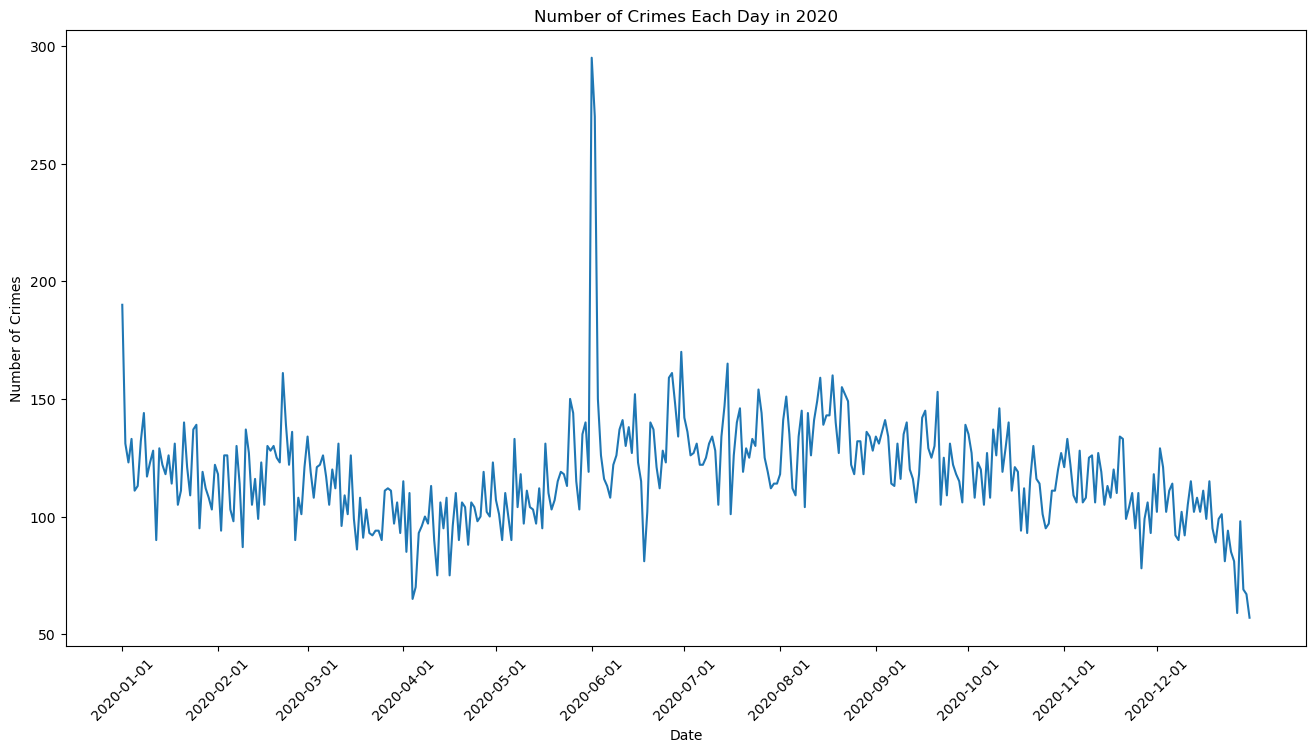

In [12]:
# Find the number of times a confirmed crime occurred each day in 2020.
daily_crime_2020 = crime_occur_2020_df.groupby('Date').size()

# Create line graph.
# Increase plot size for ease of viewing.
plt.figure(figsize=(16, 8))
plt.plot(daily_crime_2020.index, daily_crime_2020.values)

# Assign plot title and axis labels.
plt.title('Number of Crimes Each Day in 2020')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

# Set ticks on the x-axis for the first of each month.
plt.xticks(pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS'), 
           rotation=45)

# Display graph.
plt.show()

In [13]:
# Find the number of times a confirmed crime occurred each month in 2020.
monthly_crime_2020 = crime_occur_2020_df.resample('M', on='Date').size()

# Display the number of crimes that occurred each month in 2020.
monthly_crime_2020

Date
2020-01-31    3796
2020-02-29    3422
2020-03-31    3327
2020-04-30    2939
2020-05-31    3494
2020-06-30    4205
2020-07-31    4006
2020-08-31    4196
2020-09-30    3779
2020-10-31    3638
2020-11-30    3371
2020-12-31    2987
Freq: M, dtype: int64

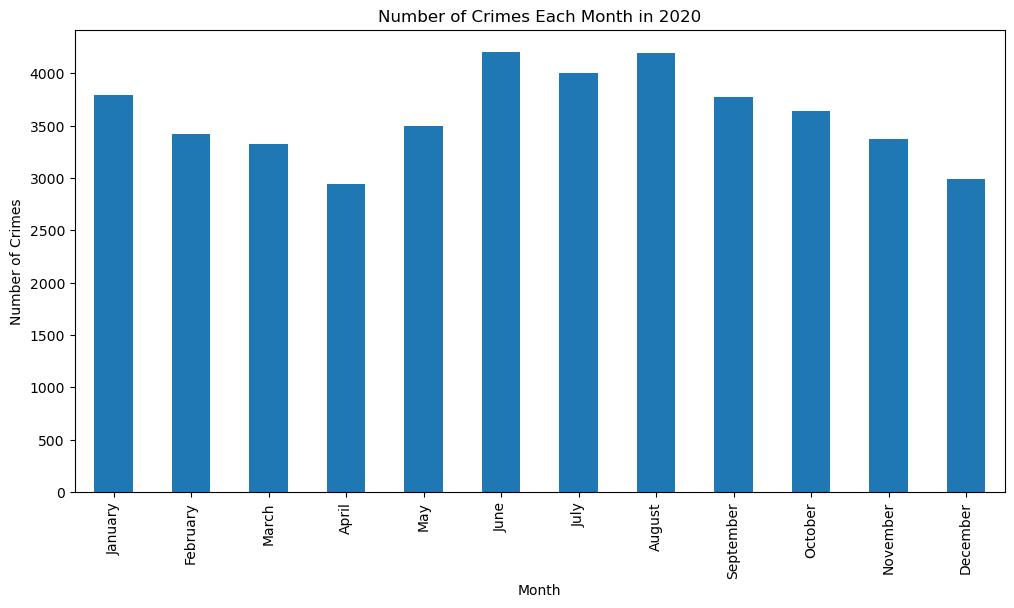

In [14]:
# Create bar graph.
# Increase plot size for ease of viewing.
plt.figure(figsize=(12, 6))
monthly_crime_2020.plot(kind='bar')

# Assign plot title and axis labels.
plt.title('Number of Crimes Each Month in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Change x-axis labels from date-time format to the month names
# for ease of viewing.
# Access the index of the monthly_crime_2020 df extract the month names.
# Assign the month names to be the x-axis labels.
month_names = monthly_crime_2020.index.strftime('%B')
plt.xticks(range(len(month_names)), month_names)

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #2: What caused the above spike in crime in June?</span><a id="Q2"></a>

In [15]:
# It appears that there is a large jump in crime volume
# around the beginning of June.
# To determine if this is an error in the data, several separate crimes,
# or one event where many crimes occurred,
# I will filter the df for entries where there are
# greater than 250 crimes in a single day.
high_crime_days = daily_crime_2020[daily_crime_2020 > 250]

# Display the dates where there are greater than 250 crimes.
high_crime_days

Date
2020-06-01    295
2020-06-02    270
dtype: int64

In [16]:
# Filter the df for the dates with a high occurance of crimes.
high_crime_days_df = crime_occur_2020_df[crime_occur_2020_df['Date'].
                                         isin(high_crime_days.index)]

# I anticipate that these dates had one or two incidents where several crimes
# occurred in a single incident or complaint.
# I will group the df by Date and Complaint and calculate the number of times
# each Complaint occurs for the dates with a high occurrence of crimes.
# I will then filter the grouping by Complaints that had greater
# than 10 incidents listed.
high_crime_day_complaints = high_crime_days_df.groupby(\
                        ['Date', 'Complaint']).size()
high_crime_day_complaints = high_crime_day_complaints\
                    [high_crime_day_complaints > 10]

# Display the complaints on high crime days with many crimes listed
# in one complaint.
high_crime_day_complaints

Date        Complaint
2020-06-01  20-023291    43
            20-024284    41
2020-06-02  20-023353    24
dtype: int64

In [17]:
# I would like to review these complaints in greater detail.
# Create a list of the complaints with a high number of crimes listed
# on one complaint
high_complaints = ['20-024284', '20-023291', '20-023353']

# Filter the dataframe for entries with the specific complaint numbers.
high_complaints_df = crime_occur_2020_df[crime_occur_2020_df['Complaint']\
                                         .isin(high_complaints)]

# Display the entries of complaints on high crime days with many crimes listed
# in one complaint.
high_complaints_df

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationName,LocationComment,CADAddress,CADStreet,XCoord,YCoord,Date,Time,UCR,Category
582,20-024284,2020-06,2020-06-01 17:15:00,Y,,,1,,043203,4,...,,,,,906969.8,1016379.0,2020-06-01,17:15:00,04,AGGRAVATED ASSAULT
583,20-024284,2020-06,2020-06-01 17:15:00,Y,,,1,,043203,4,...,,,,,906969.8,1016379.0,2020-06-01,17:15:00,04,AGGRAVATED ASSAULT
584,20-024284,2020-06,2020-06-01 17:15:00,Y,,,1,,043203,4,...,,,,,906969.8,1016379.0,2020-06-01,17:15:00,04,AGGRAVATED ASSAULT
585,20-024284,2020-06,2020-06-01 17:15:00,Y,,,1,,043203,4,...,,,,,906969.8,1016379.0,2020-06-01,17:15:00,04,AGGRAVATED ASSAULT
586,20-024284,2020-06,2020-06-01 17:15:00,Y,,,1,,043203,4,...,,,,,906969.8,1016379.0,2020-06-01,17:15:00,04,AGGRAVATED ASSAULT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,20-023353,2020-06,2020-06-02 00:30:00,Y,,,1,,041201,4,...,,,,,906441.9,1019367.0,2020-06-02,00:30:00,04,AGGRAVATED ASSAULT
813,20-023353,2020-06,2020-06-02 00:30:00,Y,,,1,,041201,4,...,,,,,906441.9,1019367.0,2020-06-02,00:30:00,04,AGGRAVATED ASSAULT
814,20-023353,2020-06,2020-06-02 00:30:00,Y,,,1,,041201,4,...,,,,,906441.9,1019367.0,2020-06-02,00:30:00,04,AGGRAVATED ASSAULT
815,20-023353,2020-06,2020-06-02 00:30:00,Y,,,1,,041201,4,...,,,,,906441.9,1019367.0,2020-06-02,00:30:00,04,AGGRAVATED ASSAULT


The Police Department's Frequently Asked Questions (https://www.slmpd.org/Crime/CrimeDataFrequentlyAskedQuestions.pdf) explains that there are some entries that might appear to be duplicates, but are actually several different charges which occurred during the same incident.  It appears that this is what happened with these complaints.

<span style="font-size: 18px; font-weight: bold;">Question #3: Are there any trends in the time of day that crime occurs?</span><a id="Q3"></a>

In [18]:
# The "Time" col is currently an object. 
# I am unable to convert directly to datetime.  
# I will convert to a string and then to datetime.
crime_occur_2020_df['Time'] = crime_occur_2020_df['Time'].astype(str)
crime_occur_2020_df['Time'] = pd.to_datetime(crime_occur_2020_df['Time'])

# Extract the hour from the time and assign it to a new column.
crime_occur_2020_df['Hour'] = crime_occur_2020_df['Time'].dt.hour

# Find the number of times a confirmed crime occurred each hour in 2020.
hourly_crime_2020 = crime_occur_2020_df.groupby('Hour').size()

# Display the volume of crime for each hour.
hourly_crime_2020

Hour
0     1929
1     1477
2     1151
3      903
4      673
5      622
6      669
7      985
8     1461
9     1576
10    1628
11    1741
12    2430
13    1973
14    1859
15    2354
16    2485
17    2721
18    2534
19    2440
20    2536
21    2421
22    2488
23    2104
dtype: int64

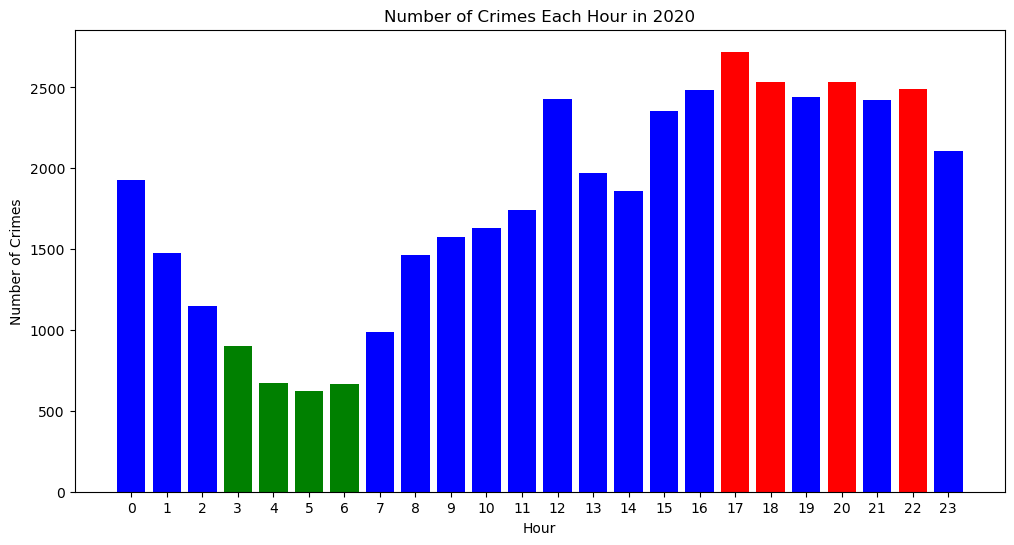

In [19]:
# Call out which hours have the highest and lowest count of crimes.

# Sort hourly_crime_2020 based on values.
sorted_hourly_crime = hourly_crime_2020.sort_values()

# Get the values of the four lowest and four highest counts.
lowest_counts = sorted_hourly_crime.head(4)
highest_counts = sorted_hourly_crime.tail(4)

# Get the middle counts by excluding the lowest and highest counts.
middle_counts = sorted_hourly_crime.drop(index=lowest_counts.index)
middle_counts = sorted_hourly_crime.drop(index=(highest_counts.index))

# Increase plot size for ease of viewing.
plt.figure(figsize=(12, 6))

# Create bar graph assigning different color of bars based on the volume of crime.
plt.bar(middle_counts.index, middle_counts.values, color='blue')
plt.bar(lowest_counts.index, lowest_counts.values, color='green')
plt.bar(highest_counts.index, highest_counts.values, color='red')

# Assign plot title and axis labels.
plt.title('Number of Crimes Each Hour in 2020')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')

# Set a tick on the x-axis for each hour of the day.
plt.xticks(range(24))

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #4: Which categories of crime are most/least prevalent in St. Louis?</span><a id="Q4"></a>

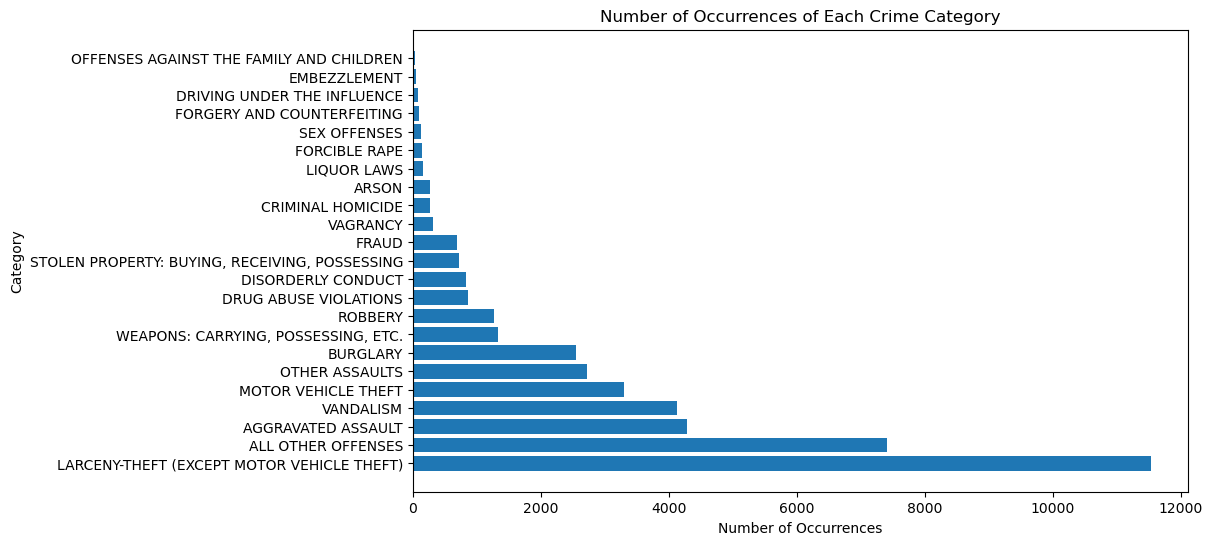

In [20]:
# Count the number of times each category occurs.
category_counts = crime_occur_2020_df['Category'].value_counts()

# Increase plot size for ease of viewing.
plt.figure(figsize=(10, 6))

# Create horizontal bar graph with index (categories) on y-axis
# and values (counts) on x-axis.
plt.barh(category_counts.index, category_counts.values)

# Assign plot title and axis labels.
plt.xlabel('Number of Occurrences')
plt.ylabel('Category')
plt.title('Number of Occurrences of Each Crime Category')

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #5: How is crime distributed among the districts?</span><a id="Q5"></a>

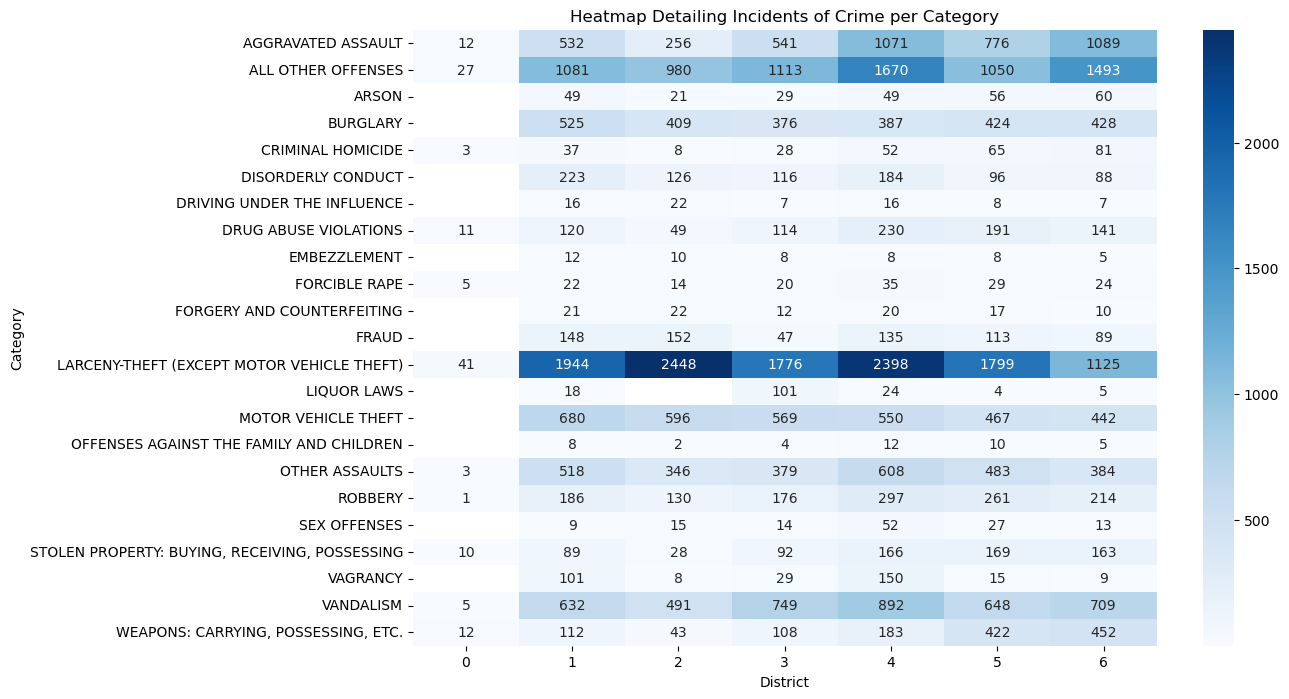

In [21]:
# Count the number of times each "District" appears per "Category".
count_cat_per_dist = crime_occur_2020_df.groupby(['Category', 'District'])\
    .size().reset_index(name='Count')

# Pivot the data so it can be passed to heatmap.
count_cat_per_dist_piv = count_cat_per_dist.pivot('Category', 'District', 'Count')

# Increase plot size for ease of viewing.
plt.figure(figsize=(12, 8))

# Create annotated heatmap.
# Adjust color of map as the original coloring theme was very dark.
sns.heatmap(count_cat_per_dist_piv, cmap='Blues', annot=True, fmt='g')

# Assign plot title and axis labels.
plt.xlabel('District')
plt.ylabel('Category')
plt.title('Heatmap Detailing Incidents of Crime per Category')

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #6: What are the top crimes in each district?</span><a id="Q6"></a>

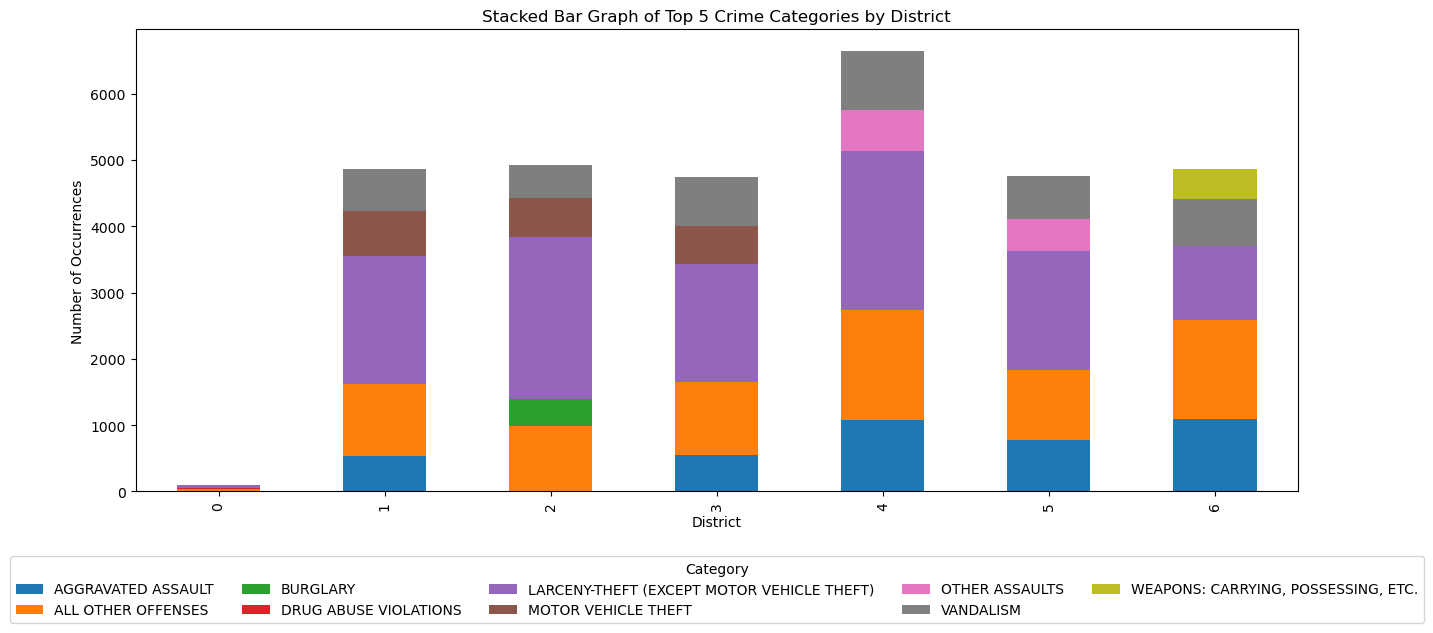

In [22]:
# Group the count_cat_per_dist df in the above step by "District".
# Apply temporary lambda function to find the top five crime categories
# in each district.
top_dist_categories = count_cat_per_dist.groupby('District')\
    .apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Pivot the dataframe so each "Category" is a col and each "District" 
# is a row with counts as the data in the body of the df.
pivot_df = top_dist_categories.pivot(index='District', columns='Category',
                                     values='Count')

# Create stacked bar graph.
# Adjust size of graph for ease of viewing.
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 6))

# Assign plot title and axis labels.
plt.xlabel('District')
plt.ylabel('Number of Occurrences')
plt.title('Stacked Bar Graph of Top 5 Crime Categories by District')

# The legend is large and obstructed the graph so used anchor
# to move the legend to below graph.
# Instead of one long list of Categories in legend,
# I spread the legend out across 5 cols.
plt.legend(title='Category', loc='lower center',\
           bbox_to_anchor=(.5, -0.30), ncol=5)

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #7: What is the delay between when a crime occurs and when it is reported?</span><a id="Q7"></a>

In [23]:
# Filter the overarching crime_df to only include entries with a confirmed crime. 
conf_crime_df = crime_df[crime_df['FlagCrime'] == 'Y']

# Ensure date/time cols are in the correct format.
conf_crime_df['CodedMonth'] = pd.to_datetime(conf_crime_df['CodedMonth'])
conf_crime_df['DateOccur'] = pd.to_datetime(conf_crime_df['DateOccur'])

# Filter out rows where 'DateOccur' is in the year 1900.
# These are entries where the occurrence date is unknown.
crime_df_wo1900 = conf_crime_df[conf_crime_df['DateOccur'].dt.year != 1900]

# Extract year and month from 'CodedMonth' and 'DateOccur' columns.
crime_df_wo1900['CodedMonth_YearMonth'] = crime_df_wo1900['CodedMonth']\
                                        .dt.to_period('M')
crime_df_wo1900['DateOccur_YearMonth'] = crime_df_wo1900['DateOccur'].\
                                        dt.to_period('M')

# Find the difference in months between 'CodedMonth' and 'DateOccur'.
# Use temporary lambda function to extract the resulting number of months.
crime_df_wo1900['TimeLag'] = (crime_df_wo1900['CodedMonth_YearMonth']\
                              - crime_df_wo1900['DateOccur_YearMonth'])\
                            .apply(lambda x: x.n)

In [24]:
# Find the average, smallest, and largest difference in occurrence
# and reporting in months.
average_reporting_time = crime_df_wo1900['TimeLag'].mean()
smallest_reporting_time = crime_df_wo1900['TimeLag'].min()
largest_reporting_time = crime_df_wo1900['TimeLag'].max()

# Print results.
print("Average difference between occurrence and report:",\
      round(average_reporting_time, 2), "months")
print("Smallest difference between occurrence and report:",\
      smallest_reporting_time, "months")
print("Largest difference between occurrence and report:",\
      largest_reporting_time, "months")

Average difference between occurrence and report: 0.5 months
Smallest difference between occurrence and report: 0 months
Largest difference between occurrence and report: 658 months


In [25]:
# Find and print the row where 'MonthDifference' is 658.
crime_df_wo1900[crime_df_wo1900['TimeLag'] == 658]

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,CADStreet,XCoord,YCoord,Date,Time,UCR,Category,CodedMonth_YearMonth,DateOccur_YearMonth,TimeLag
0,20-032651,2020-11-01,1966-01-01 00:01:00,Y,,,1,,179220,1,...,BANCROFT,884351.0,1003449.0,1966-01-01,00:01:00,17,SEX OFFENSES,2020-11,1966-01,658


<span style="font-size: 18px; font-weight: bold;">Question #:8 How is the reporting delay dispersed among the different categories of crime?</span><a id="Q8"></a>

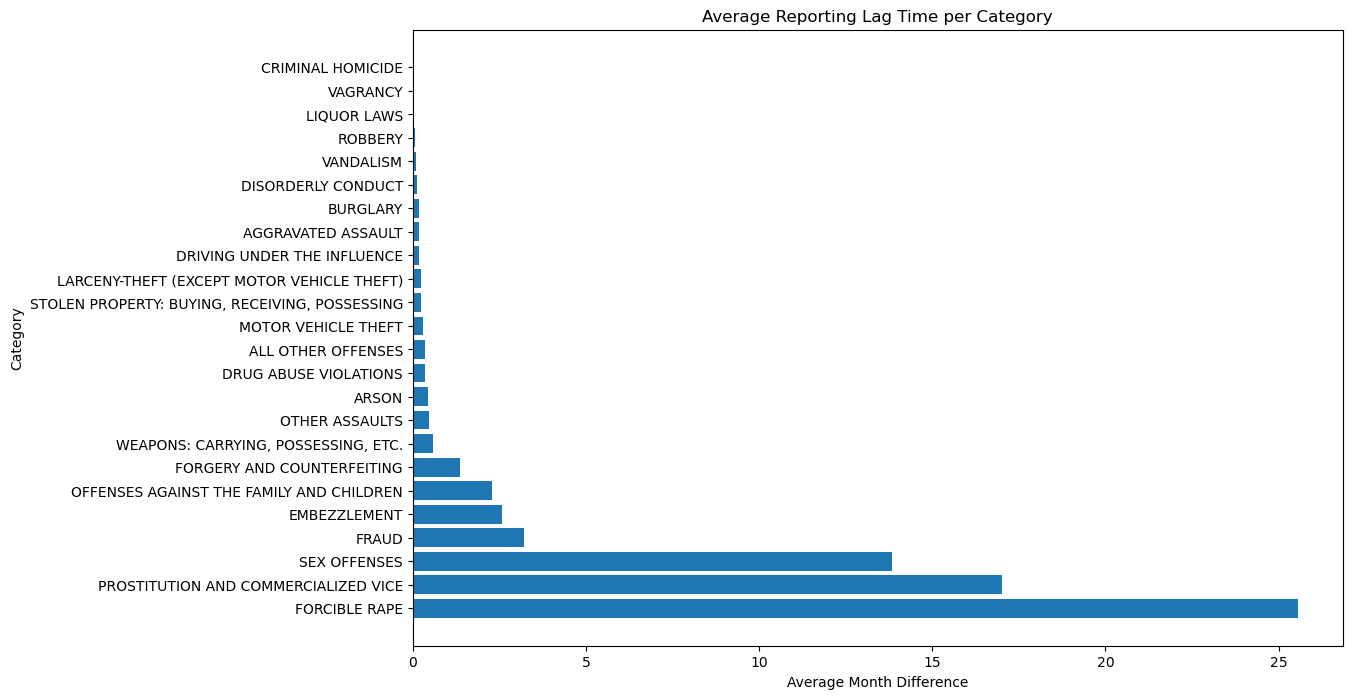

In [26]:
# Calculate the average TimeLag per category.
avg_timelag_per_cat = crime_df_wo1900.groupby('Category')['TimeLag'].mean()

# Sort the categories by time lag in descending order.
avg_timelag_per_cat = avg_timelag_per_cat.sort_values(ascending=False)

# Increase plot size for ease of viewing.
plt.figure(figsize=(12, 8))

# Create horizontal bar graph with index (categories) on y-axis
# and values (timelag) on x-axis.
plt.barh(avg_timelag_per_cat.index, avg_timelag_per_cat.values)

# Assign plot title and axis labels.
plt.xlabel('Average Month Difference')
plt.ylabel('Category')
plt.title('Average Reporting Lag Time per Category')

# Display graph.
plt.show()

<span style="font-size: 18px; font-weight: bold;">Question #:9 Why are the top three average lag times so much greater than the reporting lag time of other categories?</span><a id="Q9"></a>

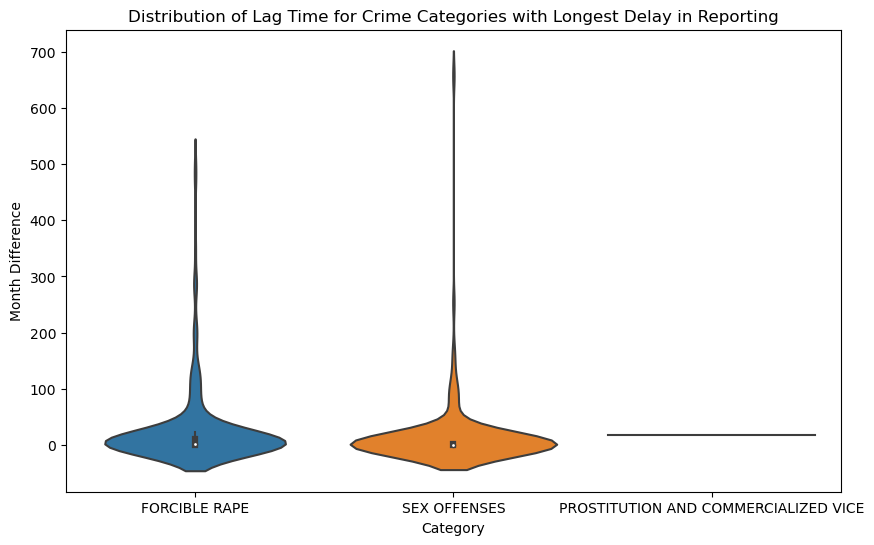

In [27]:
# Create a subset of the categories with the top 3 highest timelags in reporting.
top_3_lag = ['FORCIBLE RAPE', 'PROSTITUTION AND COMMERCIALIZED VICE',
             'SEX OFFENSES']

# Filter the df to include only the subset of categories.
top_3_lag_df = crime_df_wo1900[crime_df_wo1900['Category'].isin(top_3_lag)]

# Increase plot size for ease of viewing.
plt.figure(figsize=(10, 6))

# Create violin plot of crimes with the highest reporting lag with categories
# on y-axis and timelag on x-axis.
sns.violinplot(x='Category', y='TimeLag', data=top_3_lag_df)

# Assign plot title and axis labels.
plt.xlabel('Category')
plt.ylabel('Month Difference')
plt.title('Distribution of Lag Time for Crime Categories\
 with Longest Delay in Reporting')

# Display graph.
plt.show()

In [28]:
# Filter the dataframe based on the "Category" column for
# Prostitution and Commercialized Vice.
prostitution_entries = crime_df_wo1900[crime_df_wo1900['Category']
              == 'PROSTITUTION AND COMMERCIALIZED VICE']

# Print the filtered results.
prostitution_entries

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,CADStreet,XCoord,YCoord,Date,Time,UCR,Category,CodedMonth_YearMonth,DateOccur_YearMonth,TimeLag
88,19-028646,2020-11-01,2019-06-18 15:15:00,Y,,,1,,161000,5,...,NaN,882296.9,1034239.0,2019-06-18,15:15:00,16,PROSTITUTION AND COMMERCIALIZED VICE,2020-11,2019-06,17
89,19-028647,2020-11-01,2019-06-18 15:21:00,Y,,,1,,161000,5,...,NaN,883900.8,1032491.0,2019-06-18,15:21:00,16,PROSTITUTION AND COMMERCIALIZED VICE,2020-11,2019-06,17


<span style="font-size: 18px; font-weight: bold;">Question #10: Can future crime rates be predicted so the police department can staff appropriately and have a benchmark to determine if mitigating efforts were effective?</span><a id="Q10"></a>

In [29]:
# Convert the previously establish daily_crime_2020 series 
# which recorded the number of crimes that occurred each day to a dataframe.
daily_crime_2020_df = pd.DataFrame(daily_crime_2020.items())

# Rename cols of df.
daily_crime_2020_df.columns = ['Date', 'Frequency']

In [30]:
# Split the data so everything prior to Sept is part of the training set
# and everything from Sept onwards is part of a testing set.
training = daily_crime_2020_df.loc[daily_crime_2020_df['Date'] < '2020-9-01']
testing = daily_crime_2020_df.loc[(daily_crime_2020_df['Date'] >= '2020-9-01')]

# Set the index to 'Date' column and set frequency as 'D' for daily.
training = training.set_index('Date').asfreq('D')
testing = testing.set_index('Date').asfreq('D')

In [31]:
# Define time series prediction models and their parameters.

# HSE = # Use the mul trend as opposed to add because the line graph shows
# there is not a linear trend to crime volume. 
# Included a seasonal trend because crime is slightly higher in the summer months.

# SARIME = Use non seasonal (1,1,1) due to daily lags and seasonal (1,1,1,12)
# due to daily lags and 12 seasonal periods (months).

# ARIMA = Use (1,1,0) to base on previous day's data and make daily entries.
models = {
    'Holt-Winters': {'model': HWES, 'params':
                     {'trend': 'mul', 'seasonal': 'add'}},
    'SARIMA': {'model': SARIMAX, 'params': {'order': (1, 1, 1),
                    'seasonal_order': (1, 1, 1, 12)}},
    'ARIMA': {'model': ARIMA, 'params': {'order': (1, 1, 0)}}
}

# Fit, make predictions, and calculate RMSE for each model.
for model_name, model_info in models.items():
    model = model_info['model'](training['Frequency'], **model_info['params'])
    fit = model.fit()
    predicted = fit.forecast(steps=len(testing))
    rmse = np.sqrt(mean_squared_error(testing['Frequency'].values, predicted))
    print(f"{model_name} RMSE: {rmse}")

Holt-Winters RMSE: 14.739731886648359
SARIMA RMSE: 29.908124665328103
ARIMA RMSE: 24.122278280964366


In [32]:
# Train and fit a Holt-Winters model.
# Use the mul trend as opposed to add because the line graph shows
# there is not a linear trend to crime volume.
# Included a seasonal trend because crime is slightly higher in the summer months.
hw_model = HWES(training['Frequency'], trend='mul', seasonal='add')  
hw_fit = hw_model.fit()

# Use Holt-Winters model to make predictions.
# Make the same number of predictions as entries in the testing set.
# This is necessary to calculate RMSE.
hw_predicted = hw_fit.forecast(steps=len(testing))

# Calculate RMSE of predicted values versus values in testing set.
hw_rmse = np.sqrt(mean_squared_error(testing['Frequency'].values, hw_predicted))

In [33]:
# Calculate the average daily crime for the entire year.
avg_daily_crime = daily_crime_2020_df['Frequency'].mean()

# Calculate the percent accuracy of RMSE vs average daily crime.
percent_accuracy = ((1 - (rmse / avg_daily_crime)) * 100)

print("Average Daily Crime in Dataframe:", avg_daily_crime)
print(f"Holt-Winters RMSE: {hw_rmse}")
print("Percent Accuracy:", percent_accuracy)

Average Daily Crime in Dataframe: 117.92349726775956
Holt-Winters RMSE: 14.739731886648359
Percent Accuracy: 79.54412916859833


In [34]:
# Forecast future values for the 6 months (182 days) 
# following the training period (beginning Sept 1, 2020).
hw_predicted = hw_fit.forecast(steps=182)

# Print the predicted values.
print("Predicted values for the next 6 months:")
hw_predicted

Predicted values for the next 6 months:


2020-09-01    133.093249
2020-09-02    128.265049
2020-09-03    121.831665
2020-09-04    128.404247
2020-09-05    130.821410
                 ...    
2021-02-25     85.528334
2021-02-26     92.172008
2021-02-27     94.660123
2021-02-28     84.992087
2021-03-01     98.059705
Freq: D, Length: 182, dtype: float64

<span style="font-size: 18px; font-weight: bold;">Resources</span><a id="Resources"></a>

Federal Bureau of Investigation. (2004). Uniform Crime Reporting Handbook. https://ucr.fbi.gov/additional-ucr-publications/ucr_handbook.pdf  

St. Louis Metropolitan Police Department. (2008). Crime Data Frequently Asked Questions. https://www.slmpd.org/Crime/CrimeDataFrequentlyAskedQuestions.pdf 

St. Louis Metropolitan Police Department. (2021). SLMPD Downloadable Crime Files. 	https://www.slmpd.org/Crimereports.shtml 